1 Business Problem
Which product categories has lower reviews / maybe inferior products? (ie. electronics, iPad)
Which product have higher reviews / maybe superior products?
Business solutions:

Which products should be kept, dropped from Amazon's product roster (which ones are junk?)
Also: can we associate positive and negative words/sentiments for each product in Amazon's Catalog
By using Sentiment analysis, can we predict scores for reviews based on certain words

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline # Plots show up in notebook
np.random.seed(7) # seeding random number generator

UsageError: unrecognized arguments: # Plots show up in notebook


In [67]:
#csv = "1429_1.csv"
df = pd.read_csv('amazon.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [68]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [70]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [71]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


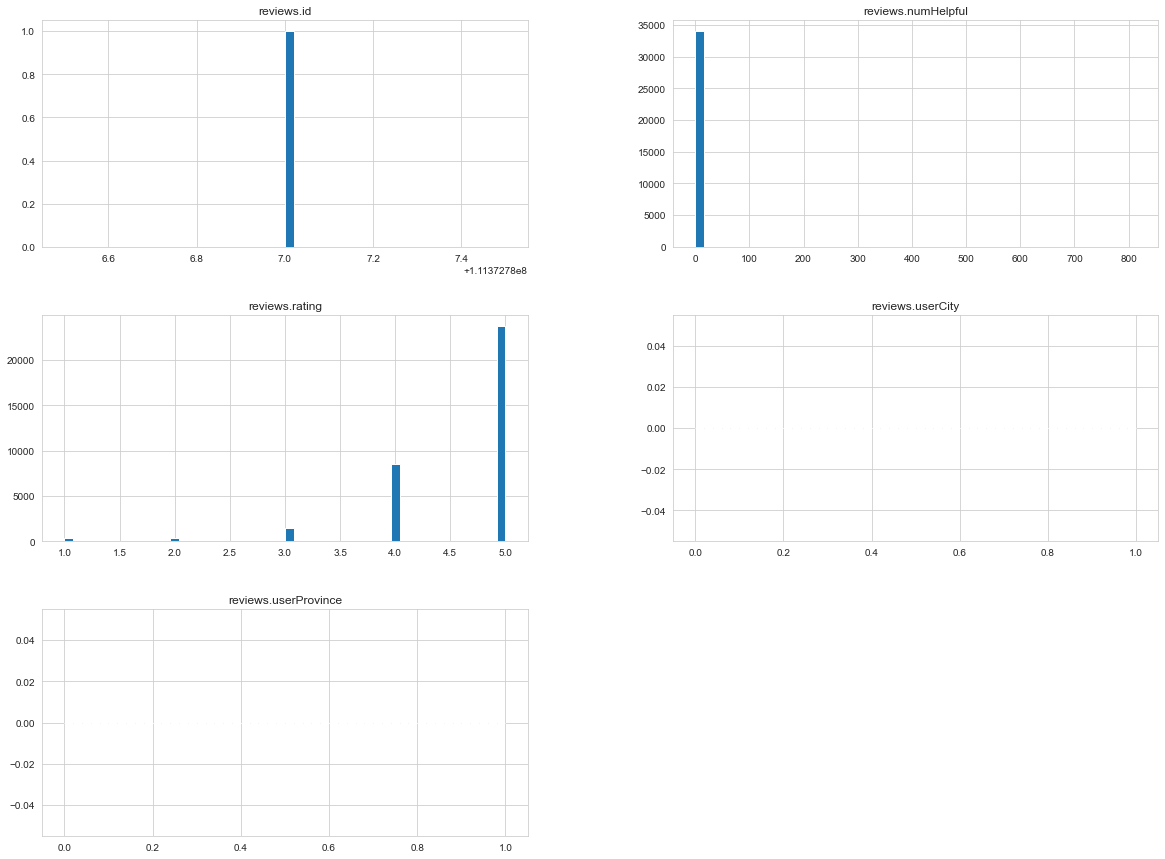

In [72]:
####Visualizing the distributions of numerical variables:

data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

In [73]:
# Split into Train/Test¶

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 34660
After 34627


In [75]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

In [76]:
#  Check to see if train/test sets were stratified proportionately in comparison to raw data.

In [77]:
len(strat_train)

27701

In [78]:
# value_count() counts all the values based on column

In [79]:
strat_train["reviews.rating"].value_counts()/len(strat_train) 

5.0    0.685968
4.0    0.246706
3.0    0.042959
1.0    0.011805
2.0    0.011696
Name: reviews.rating, dtype: float64

In [80]:
len(strat_test)

6926

In [81]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.686688
4.0    0.246029
3.0    0.044326
2.0    0.011118
1.0    0.010540
Name: reviews.rating, dtype: float64

In [82]:
# Data Exploration (Training Set)¶

In [83]:
reviews = strat_train.copy()
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
9280,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-01-05T00:00:00.000Z,2017-05-21T01:38:28Z,"2017-04-30T00:12:00.000Z,2017-06-07T08:16:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,Got this during thanksgiving sale.. had alread...,Good one for the Price !,NaN,NaN,krish
948,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-03-03T00:00:00.000Z,2017-05-21T05:55:48Z,"2017-04-30T00:42:00.000Z,2017-06-07T09:03:00.000Z",...,True,NaN,0.0,3.0,http://reviews.bestbuy.com/3545/5620406/review...,This is the second Fire tablet that I have pur...,Better than before,NaN,NaN,MSfromSanDiego
3669,AVqVGZNvQMlgsOJE6eUY,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-04-07T00:00:00.000Z,NaN,"2017-08-31T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,i liked t because its not harmful to my eye li...,great for reading,NaN,NaN,Steve
20693,AVphPmHuilAPnD_x3E5h,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"Walmart for Business,Office Electronics,Tablet...","848719040104,kindlevoyageereader6highresolutio...",Amazon,2015-02-03T00:00:00.000Z,NaN,"2017-08-31T00:00:00Z,2017-04-26T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/9302088/review...,I had an original kindle that finally gave up ...,Great upgrade,NaN,NaN,Jakash
32938,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-09-19T00:00:00.000Z,2017-09-20T05:35:53Z,"2017-08-25T22:05:25.728Z,2017-08-19T09:35:39.4...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,awesome product. Very glad I made the small in...,The future of TV,NaN,NaN,Nineturnsbush


In [84]:
# names / ASINs

In [85]:
len(reviews["name"].unique()), len(reviews["asins"].unique())

(46, 36)

In [86]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 9280 to 25553
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27677 non-null  object 
 1   name                  22282 non-null  object 
 2   asins                 27676 non-null  object 
 3   brand                 27677 non-null  object 
 4   categories            27677 non-null  object 
 5   keys                  27677 non-null  object 
 6   manufacturer          27677 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19217 non-null  object 
 9   reviews.dateSeen      27677 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27254 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27302 non-null  float64
 14  reviews.rating        27677 non-null  float64
 15  reviews.sourceUR

In [87]:
reviews.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Kindle Keyboard,,,\r\nKindle Keyboard,,,, Ama...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE         

In [88]:
# Lets see all the different names for this product that have 2 ASINs

In [89]:
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Gener

In [90]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2310
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2022
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           257
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                           104
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

In [91]:
###Confirmed our hypothesis that each ASIN can have multiple names. 
##Therefore we should only really concern ourselves with which ASINs do well,not the product names.

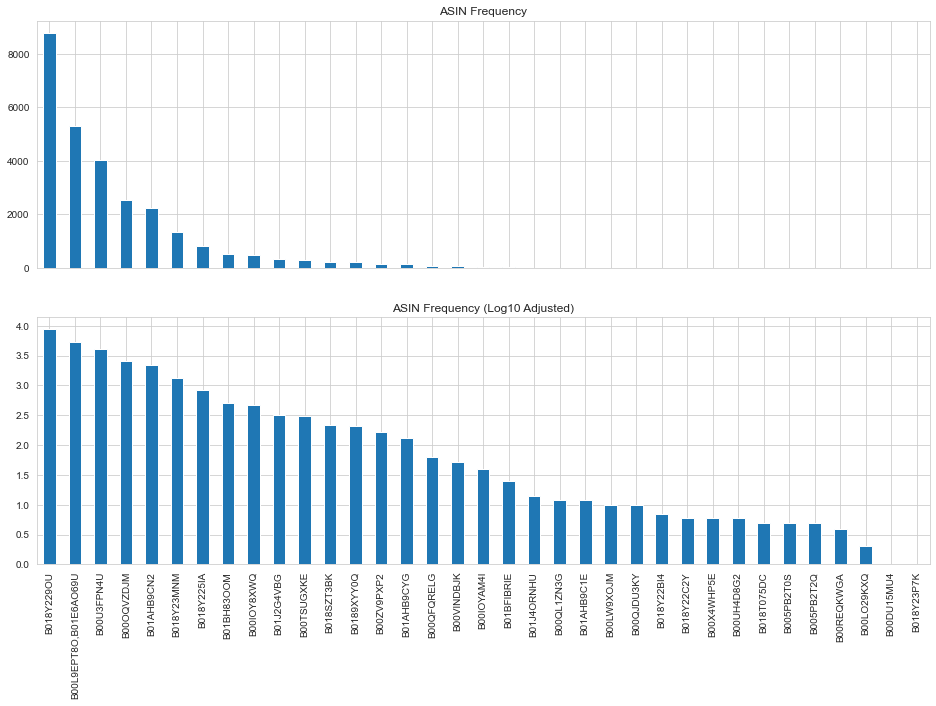

In [92]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

In [93]:
##This answers the first question that certain ASINs (products) have better sales, while other ASINs have lower sale,
#and in turn dictates which products should be kept or dropped.

In [94]:
# Entire training dataset average rating
reviews["reviews.rating"].mean()

4.584709325432669

In [95]:
# reviews.rating / ASINs

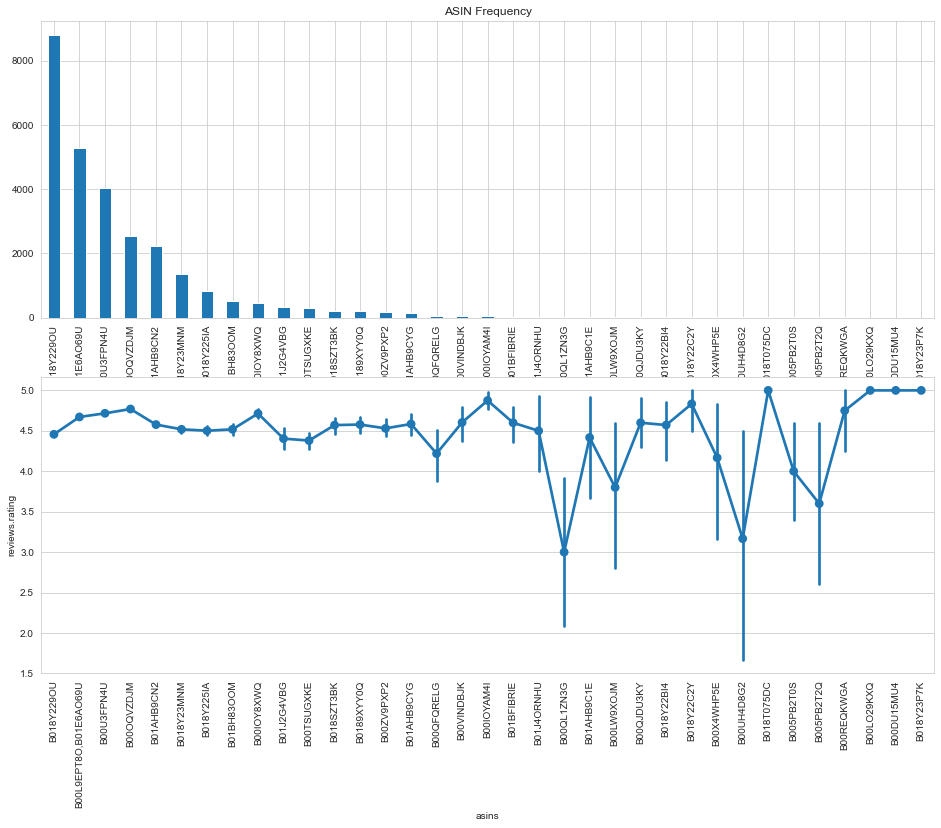

In [96]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

In [97]:
#4.3 reviews.doRecommend / ASINs

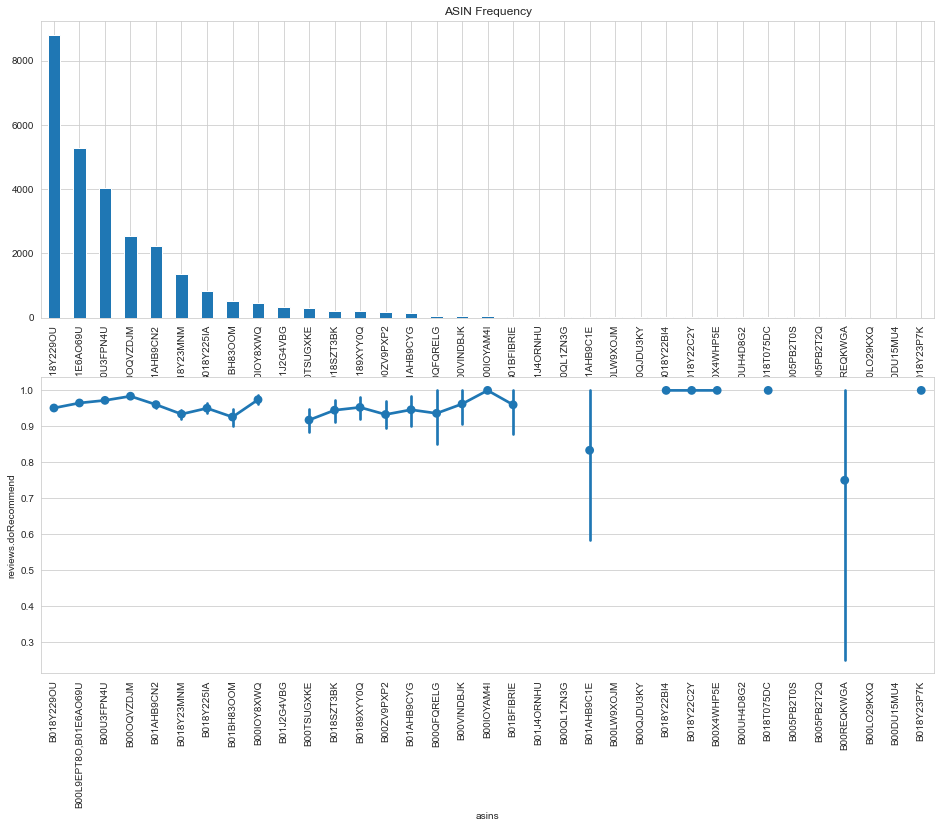

In [98]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

In [99]:
# Correlations

In [100]:
corr_matrix = reviews.corr()
corr_matrix
# Here we can analyze reviews.ratings with asins

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.000000,-0.045475,NaN,NaN
reviews.rating,NaN,-0.045475,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [101]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 9280 to 25553
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27677 non-null  object 
 1   name                  22282 non-null  object 
 2   asins                 27676 non-null  object 
 3   brand                 27677 non-null  object 
 4   categories            27677 non-null  object 
 5   keys                  27677 non-null  object 
 6   manufacturer          27677 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19217 non-null  object 
 9   reviews.dateSeen      27677 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27254 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27302 non-null  float64
 14  reviews.rating        27677 non-null  float64
 15  reviews.sourceUR

In [102]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,8794
"B00L9EPT8O,B01E6AO69U",5291
B00U3FPN4U,4038
B00OQVZDJM,2536
B01AHB9CN2,2224


In [103]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.600000
B00DU15MU4,5.000000
B00IOY8XWQ,4.713978
B00IOYAM4I,4.875000


In [104]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B018Y229OU,8794,4.456789
"B00L9EPT8O,B01E6AO69U",5291,4.671518
B00U3FPN4U,4038,4.716444
B00OQVZDJM,2536,4.769716
B01AHB9CN2,2224,4.577338
B018Y23MNM,1348,4.518546
B018Y225IA,826,4.501211
B01BH83OOM,515,4.518447
B00IOY8XWQ,465,4.713978
B01J2G4VBG,322,4.403727


,asins,reviews.rating
asins,1.000000,0.116673
reviews.rating,0.116673,1.000000


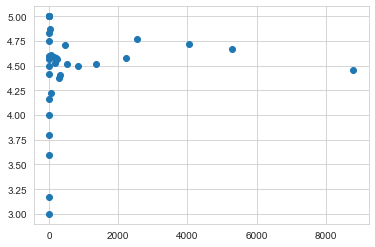

In [105]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

In [106]:
# Set Target Variable (Sentiments)

In [107]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

9280     Positive
948       Neutral
3669     Positive
20693    Positive
32938    Positive
6137     Positive
10584    Positive
15226    Positive
1835     Positive
19284    Positive
8134     Positive
1738     Positive
22737    Positive
4617     Positive
5103     Positive
10516    Positive
12364    Positive
3275     Negative
8532     Positive
9942     Positive
Name: Sentiment, dtype: object

In [108]:
# Prepare data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


In [109]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12540)

In [110]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12540)

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [112]:
#  Test Model

In [113]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.932717297141207

In [114]:
##Testing Other Models
#Logistic Regression Classifier

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9392145538550389

In [116]:
#Support Vector Machine Classifier

In [117]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.937048801617095

In [118]:
#Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.9008085475021658

In [120]:
#Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.933439214553855

In [122]:
# Fine tuning the Support Vector Machine Classifier

In [123]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
new_text = ["The tablet is good, really liked it.", # positive
            "The tablet is ok, but it works fine.", # neutral
            "The tablet is not good, does not work very well."] # negative

X_train_targetSentiment[gs_clf_LinearSVC_pipe.predict(new_text)]

KeyError: "None of [Index(['Positive', 'Positive', 'Negative'], dtype='object')] are in the [index]"

In [124]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.939936471267687

In [125]:
# Detailed Performance Analysis of Support Vector Machine Classifier

In [126]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9368254176121944
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf_linearSVC', LinearSVC())])
{'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [127]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         9
    Negative       0.75      0.25      0.38       150
     Neutral       0.57      0.11      0.19       307
    Positive       0.94      1.00      0.97      6460

    accuracy                           0.94      6926
   macro avg       0.56      0.34      0.38      6926
weighted avg       0.92      0.94      0.92      6926

Accuracy: 0.939936471267687


In [128]:
from sklearn import metrics
metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)

array([[   0,    0,    0,    9],
       [   0,   38,   13,   99],
       [   0,    4,   34,  269],
       [   0,    9,   13, 6438]], dtype=int64)